In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import os 
import numpy as np
from sklearn.linear_model import LinearRegression
os.chdir(r'F:\Racial_Block_Voting')
df_Votes = pd.read_csv('BAF-al_2020.csv',dtype={'GEOID20_left':str,'COUNTYFP20':str})
df_CD = pd.read_csv('AL_94_CD116_7.csv', dtype={'GEOID':str,'VTD':str,'CD116':str,'COUNTY':str})
TarPop = 'P0030004'
TotPop = 'P0030001'
df_Votes = df_Votes[['VTDST20','COUNTYFP20','G20PRERTRU','G20PREDBID']]
df_Votes = df_Votes.drop_duplicates().reset_index(drop=True)
df_Votes = df_Votes.rename(columns={'VTDST20':'VTD','COUNTYFP20':'COUNTY'})
df_CD = df_CD[['VTD','COUNTY',TarPop,TotPop]]
df_CD = df_CD.groupby(['VTD','COUNTY']).sum()
df = df_CD.merge(df_Votes, how='inner',on=['VTD','COUNTY'])
df = df.drop_duplicates()
df = df.drop(columns=['COUNTY'])
df_sum = df.groupby(['VTD']).sum().reset_index()
df = df[['VTD']].merge(df_sum, on='VTD')
df = df.drop_duplicates()
assert len(df.index) != 0
assert len(df_Votes.index) != 0
df['Target_Percentage'] = df[TarPop]/df[TotPop]
df['Vote_Percentage'] = df['G20PREDBID']/(df['G20PRERTRU'] + df['G20PREDBID'])
# Census Privacy DAS creates Block and VTD with 0 population and a vote total also can 0 out NaN
df = df[df[TarPop] != 0 ]


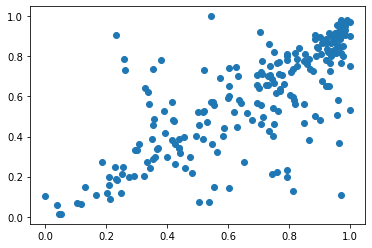

In [69]:
x = df[['Vote_Percentage']]
y = df['Target_Percentage']
plt.scatter(x, y)
plt.show()

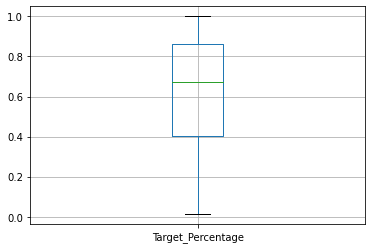

<AxesSubplot:>

In [70]:
df.boxplot(column=['Target_Percentage'])

In [71]:
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      Target_Percentage   R-squared:                       0.600
Model:                            OLS   Adj. R-squared:                  0.598
Method:                 Least Squares   F-statistic:                     362.6
Date:                Fri, 21 Jan 2022   Prob (F-statistic):           5.05e-50
Time:                        16:20:14   Log-Likelihood:                 84.223
No. Observations:                 244   AIC:                            -164.4
Df Residuals:                     242   BIC:                            -157.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0690      0.031     

eval_env: 1


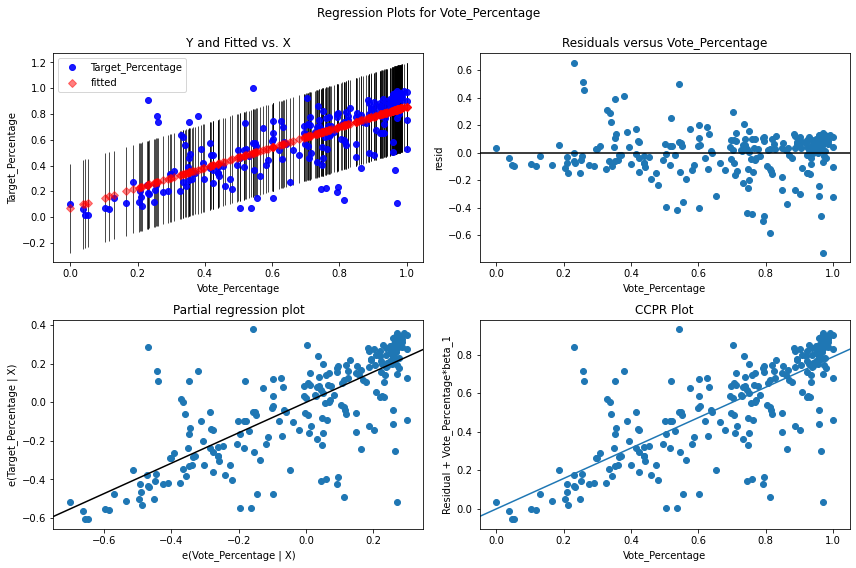

In [72]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, 'Vote_Percentage', fig=fig)

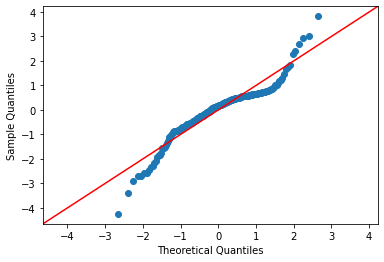

In [73]:
res = model.resid
fig = sm.qqplot(res, fit=True, line="45")
plt.show()